<a href="https://colab.research.google.com/github/pkang0831/python_import_lesson/blob/gh-pages/Data_PreProcessing_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Pre-Processing**

Lets import some libaries




In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(filename,names=headers)

**Major steps to work with missing data**

  1. identify missing data

  2. deal with missing data

  3. correct data format


In [18]:
# 1. identifying missing data
xls_err = ['#DIV/0!','#REF!','#VALUE!','#NAME?','#NULL!','#N/A','?']
# 1 line for loop in excel error modes. replace those string error mode with numpy NaN
for err in xls_err: df.replace(err,np.nan,inplace=True)
# for further identification, we can use .isnull() & .notnull() functions. It will return Boolean dtype.
missing_df = df.isnull()
# Following is for checking which columns contain null values. un-comment it if you want to see the result.
# for col in missing_df.columns.values.tolist(): print(col,"\n",missing_df[col].value_counts(),"\n")


**Deal with missing data**

How to deal with missing data?

1. replace data

  a. replace it by mean

  b. replace it by frequency

  c. replace it based on other functions

2. drop data

  a. drop the whole row

  b. drop the whole column




In [19]:
# replacement of data

for col in df.columns.drop('price').values.tolist():
  try:
    df[col].replace(np.nan,df[col].astype("float").mean(axis=0),inplace=True) # replacing with mean values
  except:
    df[col].replace(np.nan,df[col].value_counts().idxmax(),inplace=True) # replacing with most frequent values
    
df.dropna(subset=['price'],axis=0,inplace=True) # dropping observation of response variable, if NaN exists
#(this is because our target variable, if the data is missing, it loses its explainability...)
# if we have dropped rows, we need to reset the index.
df.reset_index(drop=True,inplace=True)

In [20]:
# dropping the entire rows

# in previous step, we have specified xls_err = ['#DIV/0!','#REF!','#VALUE!','#NAME?','#NULL!','#N/A','?']. but what if there is more error that is not in this array?

# we use following code. 2 ways
data_columns = ["normalized-losses","wheel-base", "length","width","height","curb-weight", "engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
# if you want to apply all columns, you can do:
# data_columns = df.columns, or put the df.columns itself to the data_columns argument.
num_df = (df.drop(data_columns, axis=1)
         .join(df[data_columns].apply(pd.to_numeric, errors='coerce')))# this will convert any non-numerc to numpy NaN values.

num_df = num_df[num_df[data_columns].notnull().all(axis=1)] # this will drop the rows that contains NaN values.
num_df.reset_index(drop=True, inplace=True) # resets the index
num_df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [21]:
# typecasting
# type casting is a subject that was discussed earlier, but as a practice, lets do it again.
# for col in df.columns: df[col] = df[col].astype(float)
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float") # you don't need to hard code this type casting, but for the sake of time, just copying and paste. 
# in order to perform this detailed casting, you need to know and understand the variables
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [22]:
# Data standardization
# Data standardization simply means you would standardize the data to more meaningful data for comparison.
# E.g. converting "city-mpg" to "city-L/100km"
# df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={"city-mpg":"city-L/100km"},inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [23]:
# Data Normalization
# Normalizing via max (this is an example. any normalization method, google it and apply it)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

In [24]:
# Data binning
df['horsepower'] = df['horsepower'].astype(int, copy = True)

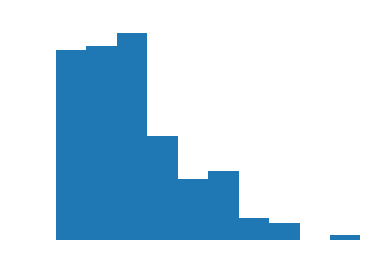

In [25]:
# Lets put some of our data into histogram.
# When you import matplotlib or matplotlib.pyplot, you need to use %matplotlib inline
# to assure that the figure that you put is included in the jupyter notebook, when you 
# publish it.
# sytax is as follows:

%matplotlib inline

# lets draw histogram. the function '.hist' is used in pyplot, from matplotlib.
# remember, we have called matplotlib as plt
with plt.rc_context({'axes.edgecolor':'white', 
                     'xtick.color':'white', 
                     'ytick.color':'white'}):
# plt.rc_context provide figure setting parameters. there is another way, but we will
# review it later. it is important that all the histogram, label and title setting needs
# to be within "with plt.rc_context" instance.
  plt.pyplot.hist(df['horsepower'])
  plt.pyplot.xlabel('Horsepower',fontdict={'color':'white'})
  plt.pyplot.ylabel('Count',fontdict={'color':'white'})
  plt.pyplot.title('Data',fontdict={'color':'white'})


In [26]:
# lets bin our data
bins = np.linspace(df["horsepower"].min(),df["horsepower"].max(),4) # you don't really have to do this;
# plt.pyplot.hist(df['horsepower'],bins=3)<-this bins part automatically bin the data into 3 equally spaced bins
group_names = ['Low','Medium','High']
# np.linspace return evenly spaced numbers over a specified interval.
# syntax: np.linspace(start number, end number, interval)
group_names_inv = list(reversed(group_names))


In [27]:
df['horsepower_binned'] = pd.cut(df['horsepower'],bins, labels=group_names,include_lowest=True)
data = df["horsepower_binned"].value_counts()
data = data.iloc[::-1]

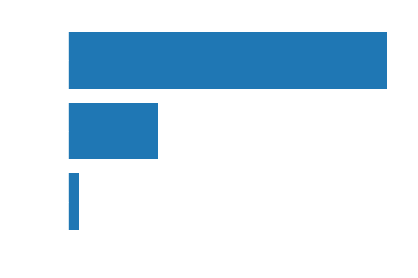

In [28]:
%matplotlib inline
with plt.rc_context({'axes.edgecolor':'white', 
                     'xtick.color':'white', 
                     'ytick.color':'white'}):
  # plt.pyplot.bar(group_names, df['horsepower_binned'].value_counts()) # you can draw bar graph
  # plt.pyplot.barh(group_names,df["horsepower_binned"].value_counts()) # you can draw barh graph
  plt.pyplot.barh(group_names_inv,data)
  plt.pyplot.xlabel('horsepower type',fontdict={'color':'white'})
  plt.pyplot.ylabel('counts',fontdict={'color':'white'})
  plt.pyplot.title('horsepower data',fontdict={'color':'white'})


In [29]:
# indicator variables (one-hot-encoding?)
# if our response (or target variable) is not numerically represented; yet we want to represent those categoricals to numerics, 
# we use something called one-hot-encoding.
# lets check our dataframe first.
# for col in df.columns: print(df[col].value_counts()) # uncomment this to check data counts
# we see that the fuel type is in either gas or diesel. lets get that one hot encoding using pd.get_dummies()
encoded = pd.get_dummies(df['fuel-type'])
# encoded.shape
df = df.join(encoded)
# or you can use pd.concat function
# df = pd.concat([df,encoded],axis=1)
df.drop('fuel-type',axis=1,inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,horsepower_binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1
